In [34]:
import numpy as np
import scipy.optimize as op
import datetime
import emcee
import matplotlib.pyplot as plt
import corner
from scipy.stats import norm, halfnorm
%matplotlib inline

In [2]:
mars = np.genfromtxt('harp_mars.dat', usecols=np.arange(0, 9))
jupiter = np.genfromtxt('harp_jupiter.dat', usecols=np.arange(0, 8))
uranus = np.genfromtxt('harp_uranus.dat', usecols=np.arange(0, 8))

In [3]:
mars_etamb = mars[:,5]
jupiter_etamb = jupiter[:,5]
uranus_etamb = uranus[:,5]

mars_dates = mars[:,0]
jupiter_dates = jupiter[:,0]
uranus_dates = uranus[:,0]

mars = mars[mars[:,1] > 5]
mars = mars[mars[:,1] < 19]
mars = mars[mars[:,5] > 0]
jupiter = jupiter[jupiter[:,1] > 5]
jupiter = jupiter[jupiter[:,1] < 19]
jupiter = jupiter[jupiter[:,5] > 0]
uranus = uranus[uranus[:,1] > 5]
uranus = uranus[uranus[:,1] < 19]
uranus = uranus[uranus[:,5] > 0]

planets_etamb = np.concatenate((mars_etamb, jupiter_etamb, uranus_etamb), axis=0)
raw_dates = np.concatenate((mars_dates, jupiter_dates, uranus_dates), axis=0)
dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d') for date in raw_dates]

In [4]:
oldest = min(dates)
days = np.array([np.float64((date - oldest).days) + 1 for date in dates])

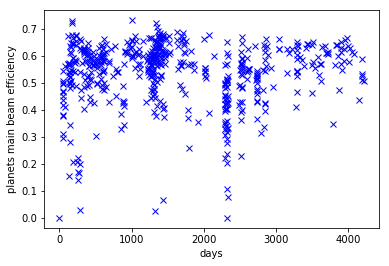

In [5]:
plt.figure(1)
plt.plot(days, planets_etamb, 'bx')
plt.xlabel('days')
plt.ylabel('planets main beam efficiency')
plt.show()

In [28]:
m_true = 0.0
b_true = .5

lnyerr_true = -2.3
lnV_true = -1.6
lnbias_true = -1.6

In [7]:
print(np.log(.1))
print(np.log(.2))

-2.30258509299
-1.60943791243


In [210]:
def lnlike(theta, x, y):
    m, b, lnyerr, lnV, lnbias = theta
    #print(m, b, lnyerr, lnV)
    angle = np.arctan(m)
    delt = -np.sin(angle)*x + np.cos(angle)*y - b*np.cos(angle)
    sigsq = (np.exp(lnyerr)*y)**2 * np.cos(angle)**2
    return -np.sum(0.5*np.log(sigsq + np.exp(lnV) + np.exp(lnbias))) - \
            np.sum(0.5*(delt**2)/(sigsq + np.exp(lnV) + np.exp(lnbias)))

In [211]:
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, lnyerr_true, lnV_true, lnbias_true], args=(days, planets_etamb))
m_ml, b_ml, lnyerr_ml, lnV_ml, lnbias_ml = result["x"]

In [212]:
print(m_ml, b_ml, lnyerr_ml, lnV_ml, lnbias_ml)
print(np.exp(lnyerr_ml), np.exp(lnV_ml))

1.97506876984e-06 0.534767004151 -10.7864320836 -4.9896414442 -4.9875337975
2.06781683439e-05 0.00680810514023


In [192]:
print(np.log(.1))
print(np.exp(-1.6))

-2.30258509299
0.201896517995


In [289]:
def lnprior(theta):
    m, b, lnyerr, lnV, lnbias = theta
    if 0.0 < b < 1.0:
#   if -1.0 < m < 1.0 and 0.0 < b < 1.0 and -5.0 < lnyerr < 0.0 and -3.0 < lnV < 0.0:
        pri_m = norm.logpdf(m, 0.0, 1.0)
        pri_lnyerr = norm.logpdf(lnyerr, -2.5, 2.5/3.0)
        pri_lnV = halfnorm.logpdf(np.sqrt(np.exp(lnV)), 0, .1)
        pri_lnbias = halfnorm.logpdf(np.sqrt(np.exp(lnbias)), 0, b/3.0)
        return pri_m + pri_lnyerr + pri_lnV + pri_lnbias
    return -np.inf

In [1]:
print(np.exp(-2.5))
print(np.exp(-3))
print(np.exp(0))

NameError: name 'np' is not defined

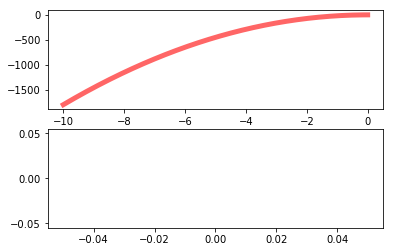

In [291]:
x = np.linspace(-10, 10, 1000)
plt.subplot(211)
plt.plot(x, halfnorm.logpdf(-x, 0, .5/3),'r-', lw=5, alpha=0.6)
plt.subplot(212)
plt.plot(x, halfnorm.pdf(x, np.log(1/1000), np.log(.5)),'r-', lw=5, alpha=0.6)

In [292]:
print(np.log(.5))


-0.69314718056


In [293]:
def test(theta, x, y):
    return 0

In [294]:
def lnprob(theta, x, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)

In [295]:
ndim, nwalkers = 5, 200
# pos = [result["x"] + np.random.randn(ndim)*1e-4*[.2, .1, .5, .3, .3] for i in range(nwalkers)] #nwalkers x ndim entries
pos = [np.random.randn(ndim)*1e-4*[0.001, .6, -2.5, -2.5, -1.0] for i in range(nwalkers)]

In [296]:
print(np.log(.3
            ))

-1.20397280433


In [297]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(days, planets_etamb), threads=4, a=4.0)

/Users/rebeccachen/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2510: RuntimeWarning: overflow encountered in multiply
  return 0.5 * np.log(2.0/np.pi) - x*x/2.0
/Users/rebeccachen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/rebeccachen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/rebeccachen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/rebeccachen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/rebeccachen/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2510: RuntimeWarning: overflow encountered in multiply
  return 0.5 * np.log(2.0/np.pi) - x*x/2.0
/Users/rebeccachen/anaconda/lib/python3.6/site-packages/scipy/stats/_con

In [298]:
sampler.run_mcmc(pos, 1000)

/Users/rebeccachen/anaconda/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/rebeccachen/anaconda/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


(array([[  7.86354589e-06,   5.22680730e-01,  -3.89222475e+00,
          -1.62796203e+13,  -4.31180809e+00],
        [ -1.56945619e-06,   5.40333644e-01,  -4.17398320e+00,
          -9.69944283e+13,  -4.30212556e+00],
        [  6.97666309e-07,   5.31735871e-01,  -2.83710088e+00,
          -4.68647570e+13,  -4.28630103e+00],
        [ -2.85864161e-06,   5.42896091e-01,  -3.87558463e+00,
          -5.32764855e+14,  -4.23457169e+00],
        [  5.96112370e-06,   5.20673989e-01,  -3.32656640e+00,
          -1.62801785e+15,  -4.27378773e+00],
        [ -9.54714794e-07,   5.44389969e-01,  -3.85864745e+00,
          -3.24462702e+13,  -4.40023758e+00],
        [  3.20483777e-06,   5.39109325e-01,  -3.62953532e+00,
          -1.35774992e+14,  -4.31681301e+00],
        [  1.14368591e-05,   5.21890559e-01,  -4.55172310e+00,
          -2.29954965e+14,  -4.28560000e+00],
        [  2.32918321e-07,   5.43094295e-01,  -4.26806305e+00,
          -2.80925084e+14,  -4.33474101e+00],
        [  5.040367

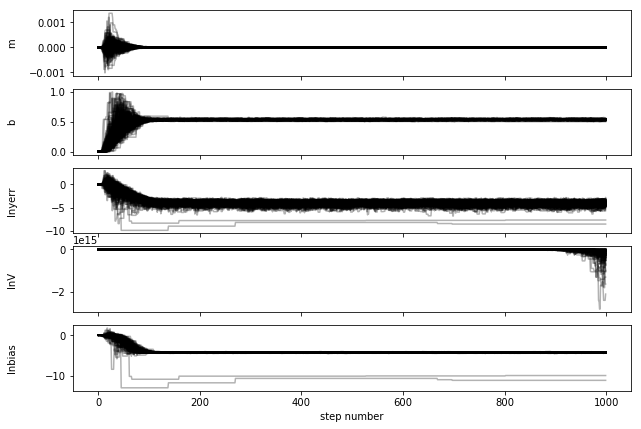

In [299]:
plt.figure(1)
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.chain
labels = ["m", "b", "lnyerr", "lnV", "lnbias"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i].T, "k", alpha=0.3)
#     ax.set_xlim(0, len(samples))
    #(nwalkers, nsteps, dim)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
fig.savefig("200walkers_smallinit_a4.0_1000steps_bias.png")
plt.show()

In [300]:
flat_samples = sampler.chain[:, 200:, :].reshape((-1, ndim))

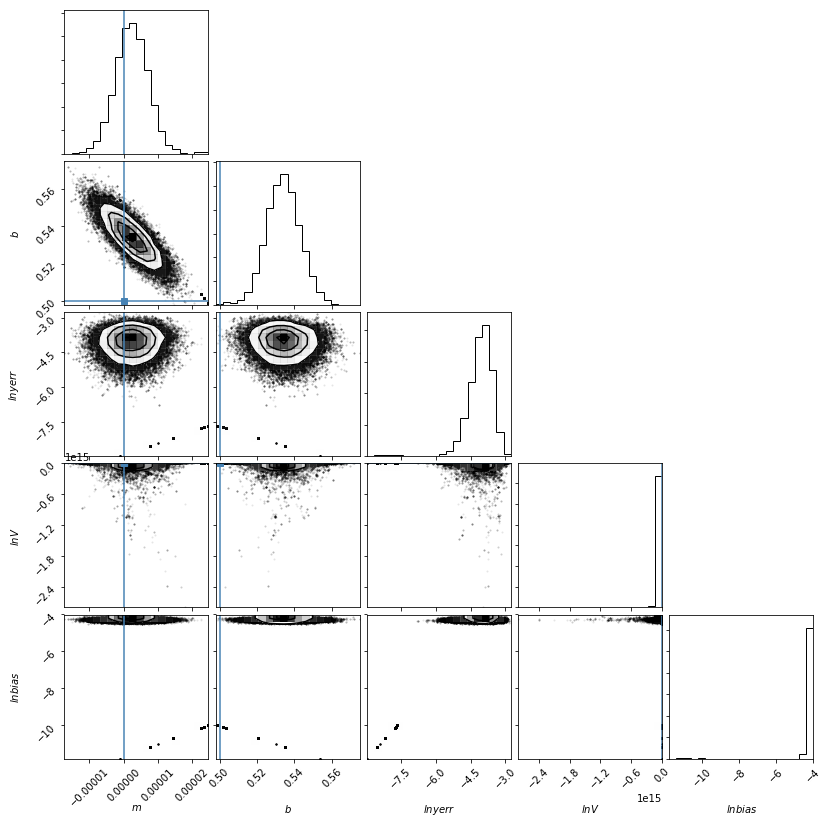

In [301]:
fig = corner.corner(flat_samples, labels=["$m$", "$b$", "$lnyerr$", "$lnV$", "$lnbias$"],
                      truths=[m_true, b_true, lnyerr_true, lnV_true, lnbias_true])
fig.savefig("200walkers_smallinit_a4.0_1000steps_bias_corner.png")

In [302]:
from IPython.display import display, Math
results = []

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    results.append(mcmc)
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [304]:
print(np.exp(-1.373))
print(np.exp(-.586))
print(np.exp(-3.9))
print(np.sqrt(np.exp(-5.5)))
print(np.exp(-3.8))

0.253345781013
0.55654903441
0.0202419114458
0.0639278612067
0.0223707718562


2.28979409607e-06


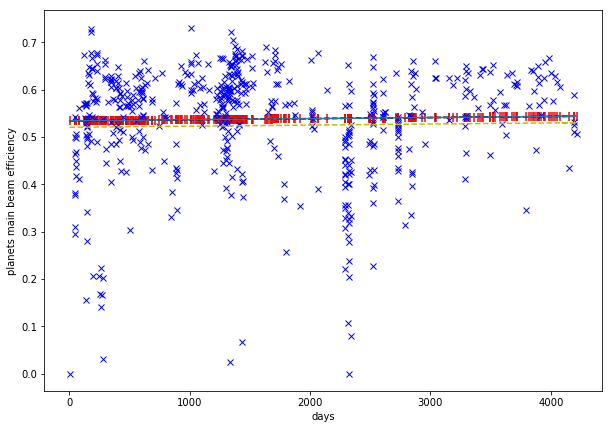

In [307]:
plt.figure(figsize=(10,7))
plt.plot(days, planets_etamb, 'bx')
m = results[0][1]
b = results[1][1]
y = m*days + b
yerr = np.exp(results[2][1]) * y
V = np.exp(results[3][1])
bias = np.exp(results[4][1])
plt.xlabel('days')
plt.ylabel('planets main beam efficiency')
plt.errorbar(days, y, yerr=yerr, ecolor='red')
plt.plot(days, y + V, '--', color='k')
plt.plot(days, y - V, '--', color='k')
plt.plot(days, y - bias, '--', color='y')
plt.show()

In [25]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))
# print("Autocorrelation time:  ", sampler.get_autocorr_time())

Mean acceptance fraction: 0.348


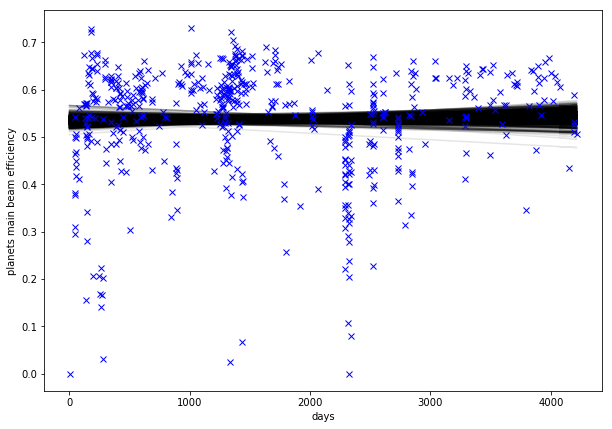

In [26]:
plt.figure(figsize=(10,7))
for m, b, lnyerr, lnV in samples[np.random.randint(len(samples), size=500)][np.random.randint(500)]:
    plt.plot(days, m*days+b, color="k", alpha=0.1)
plt.plot(days, planets_etamb, 'bx')
plt.xlabel('days')
plt.ylabel('planets main beam efficiency')
# plt.errorbar(days, planets_etamb, yerr=np.exp(lnyerr)*(m*days+b))

In [27]:
print(np.random.randint(len(samples), size=100))
print(samples.shape)
print(len(samples))
#(nwalkers, nsteps, dim)
# print(samples[np.random.randint(len(samples), size=200)][0])
print(samples[np.random.randint(len(samples), size=200)][np.random.randint(len(samples))])

[120  12 126 189  58 191 102 114 101 195 177  47  49 186 125 160 191  82
  48  84  17 181  13 181  72  87  49  94  19 187  51  16 179  50 118 181
 131 118 102   9  46 144  17 146  63 111  21 111  66  47 188 187  55  42
 141 102 160  63   4  12 178  95 134  92  93  39  78 185  50 152 127 170
 157  33 153 140 196  87 148  98 135 122  47 108   1 155  56  87 186 102
  59 127 161  97 178 173 194 129 194   1]
(200, 1000, 4)
200
[[  1.17123243e-05   5.34775403e-01  -1.00932774e+01  -4.29548580e+00]
 [  6.27665607e-06   5.34768817e-01  -1.00932687e+01  -4.29548713e+00]
 [  6.49958318e-06   5.34769669e-01  -1.00932431e+01  -4.29548124e+00]
 ..., 
 [ -3.55789657e-06   5.50661634e-01  -4.26056601e+00  -4.30891216e+00]
 [ -3.55789657e-06   5.50661634e-01  -4.26056601e+00  -4.30891216e+00]
 [ -3.55789657e-06   5.50661634e-01  -4.26056601e+00  -4.30891216e+00]]
